In [9]:
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas

In [10]:
df = pd.read_csv("compiled_raw_y.csv")
df = df.drop(columns=['Y','Y+1','Y+2','Y+3','Y+4','Y+5','Y+6','Y+7'])

df = df[df['FRSHTT'].apply(lambda x: len(str(x)) == 5)]

df['FOG'] = df.FRSHTT.apply(lambda x: int(str(x)[0]))
df['RAIN'] = df.FRSHTT.apply(lambda x: int(str(x)[1]))
df['SNOW'] = df.FRSHTT.apply(lambda x: int(str(x)[2]))
df['HAIL'] = df.FRSHTT.apply(lambda x: int(str(x)[3]))
df['TT'] = df.FRSHTT.apply(lambda x: int(str(x)[4]))

df = df.drop(columns=['FRSHTT', 'FOG'])
df.reset_index(drop=True, inplace=True)

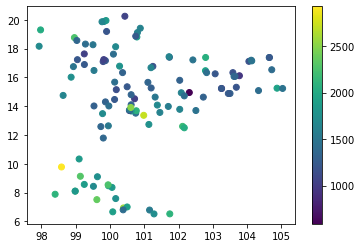

In [11]:
data = [df["STATION"], df["LATITUDE"], df["LONGITUDE"]]
headers = ["STATION","LAT", "LONG"]
df3 = pd.concat(data, axis=1, keys=headers)

df3 = df3.fillna('')\
      .groupby(df3.columns.tolist()).apply(len)\
      .rename('COUNT')\
      .reset_index()\
      .replace('',np.nan)

plt.scatter(df3['LONG'], df3['LAT'], c=df3['COUNT'])
plt.colorbar()
plt.show()


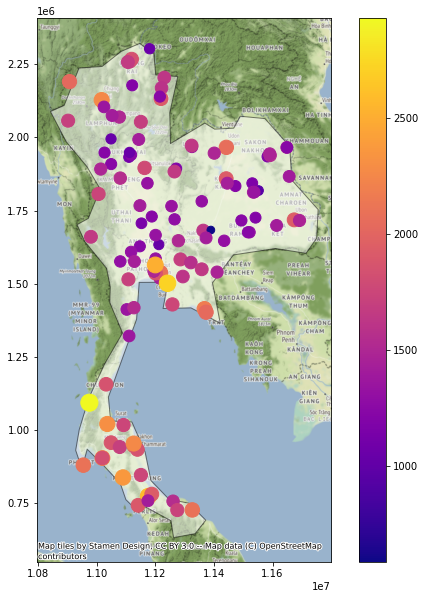

In [12]:
geometry = geopandas.points_from_xy(df3.LONG, df3.LAT)

gdf = geopandas.GeoDataFrame(
    df3, 
    crs='EPSG:4326',
    geometry=geometry)

gdf['values'] = df3['COUNT']
gdf = gdf.to_crs(epsg=3857)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=3857)

# Restringir a tailandia
ax = world[world.name == 'Thailand'].plot(
    figsize=(10, 10),
    color='white',
    alpha=0.5,
    edgecolor='k')

ctx.add_basemap(ax)
# Plot geodataframe
gdf.plot(ax=ax, column='values', cmap='plasma', legend=True, markersize=(gdf['values']/10))
plt.savefig('thailand_stations.jpg')
plt.show()